In [24]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets

from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import os.path as path

In [36]:
plt.rcParams["font.family"] = "Malgun Gothic" # window

In [41]:
class SkinClassfierModel(nn.Module):
    def __init__(self):
        super(SkinClassfierModel, self).__init__()
        
        self.conv1 = nn.Conv2d(128, 128, 3)
        self.dropout1 = nn.Dropout(0.2)
        self.conv2 = nn.Conv2d(64, 64, 3)
        self.dropout2 = nn.Dropout(0.2)
        
        self.fc1 = nn.Linear(32, 32, True)
        self.res = nn.Softmax(6)
        
    def forward(self, x):
        x = F.relu(self.conv1(input))
        x = F.max_pool2d(x, (2, 2))
        x = self.dropout1(x)
        
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, (2, 2))
        x = self.dropout2(x)
        
        x = torch.flatten(x)
        x = self.fc1(x)
        x = self.res(x)
        return x

In [ ]:
# class ImageDataset(Dataset):
#     def __init__(self, json_dir, img_dir, transform=None):
#         self.img_dir = img_dir
#         self.json_dir = json_dir
#         self.transform = transform
        
#         self.img_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.png'))])
    
#     def __len__(self):
#         return len(self.img_files)
    
#     def __getitem__(self, idx):
#         img_name = self.img_files[idx]
#         img_path = os.path.join(self.img_dir, img_name)
#         json_path = os.path.join(self.json_dir, os.path.splitext(img_name)[0] + ".json")
#         image = Image.open(img_path).convert("RGB")
        
#         with open(json_path, 'r', encoding='utf-8') as f:
#             annot = json.load(f)
        
#         mask = np.zeros((h, w), dtype=np.uint8)

['건선', '아토피', '여드름', '정상', '주사', '지루']
{'건선': 0, '아토피': 1, '여드름': 2, '정상': 3, '주사': 4, '지루': 5}


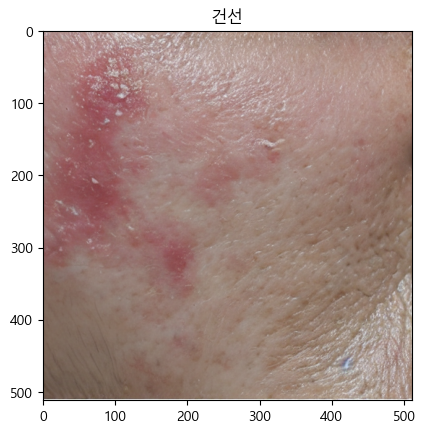

In [42]:
dataset = datasets.ImageFolder(root=path.join("dataset", "training", "resource"))

print(dataset.classes)
print(dataset.class_to_idx)
idx_to_class = {v:k for k , v in dataset.class_to_idx.items()}

img, label = dataset[0]
plt.imshow(img)
plt.title(f"{idx_to_class[label]}")
plt.show()

In [43]:
model = SkinClassfierModel()
print(model)

SkinClassfierModel(
  (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=32, out_features=32, bias=True)
  (res): Softmax(dim=6)
)
